<a href="https://colab.research.google.com/github/TriDuks/AIXuLyAnh/blob/main/Class_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array


In [2]:
#Preprocessing để Training 
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
#train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Name_class/Training', 
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

Found 628 images belonging to 10 classes.


In [73]:
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
test_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/AI/Name_class/Test (1)', 
                                                
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                class_mode = 'categorical')

Found 27 images belonging to 10 classes.


In [43]:
training_set.class_indices

{'CPhi': 0,
 'Chi': 1,
 'Chuong': 2,
 'NHuy': 3,
 'Phong': 4,
 'Thang': 5,
 'Tri': 6,
 'Tu': 7,
 'Tuan': 8,
 'VBinh': 9}

In [44]:
test_set.class_indices

{'CPhi': 0,
 'Chi': 1,
 'Chuong': 2,
 'NHuy': 3,
 'Phong': 4,
 'Thang ': 5,
 'Tri': 6,
 'Tu': 7,
 'Tuan': 8,
 'VBinh': 9}

In [45]:
len(training_set)

20

In [46]:
len(test_set)

1

# **TẠO MODEL BẰNG CNN**

In [69]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam


In [74]:
# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[30,40,3],padding='same')) #3 kênh màu RGB
model.add(LeakyReLU(alpha=0.1))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Dropout( 0.1))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(10, activation='softmax'))
model.summary()

# Thiết lập thông số
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
# Huấn luyện
# fit the model
# Run the cell. It will take some time to execute
a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), 
                        validation_steps=len(test_set)
)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_108 (LeakyReLU)  (None, 30, 40, 32)       0         
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 dropout_27 (Dropout)        (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                

<ipython-input-74-425260692110>:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set),


20/20 [==============================] - 5s 148ms/step - loss: 2.2611 - accuracy: 0.1019 - val_loss: 2.0480 - val_accuracy: 0.1852
Epoch 2/80
20/20 [==============================] - 2s 90ms/step - loss: 1.5910 - accuracy: 0.4602 - val_loss: 0.8946 - val_accuracy: 0.6667
Epoch 3/80
20/20 [==============================] - 2s 83ms/step - loss: 0.7238 - accuracy: 0.7564 - val_loss: 0.5870 - val_accuracy: 0.8519
Epoch 4/80
20/20 [==============================] - 2s 76ms/step - loss: 0.3822 - accuracy: 0.8901 - val_loss: 0.7030 - val_accuracy: 0.8148
Epoch 5/80
20/20 [==============================] - 1s 73ms/step - loss: 0.2400 - accuracy: 0.9331 - val_loss: 0.4406 - val_accuracy: 0.8889
Epoch 6/80
20/20 [==============================] - 1s 73ms/step - loss: 0.2099 - accuracy: 0.9459 - val_loss: 0.4308 - val_accuracy: 0.9259
Epoch 7/80
20/20 [==============================] - 1s 73ms/step - loss: 0.2342 - accuracy: 0.9172 - val_loss: 0.3852 - val_accuracy: 0.9259
Epoch 8/80
20/20 [=====

In [75]:
# Thiết lập thông số
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])


In [ ]:
# Huấn luyện
# fit the model
# Run the cell. It will take some time to execute
a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), 
                        validation_steps=len(test_set)
)


In [77]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_set, verbose=False)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.6282474398612976
Test accuracy: 0.9259259104728699


In [ ]:
y_pred = model.predict_generator(test_set)
y_pred_class = y_pred > 0.5
y_pred_class

<ipython-input-135-467eccc537b7>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_set)


array([[False, False, False,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False,  True,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False,  True, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
         True]])

In [ ]:
training_set.class_indices

{'CPhi': 0,
 'Chi': 1,
 'Chuong': 2,
 'NHuy': 3,
 'Phong': 4,
 'Thang': 5,
 'Tri': 6,
 'Tu': 7,
 'Tuan': 8,
 'VBinh': 9}

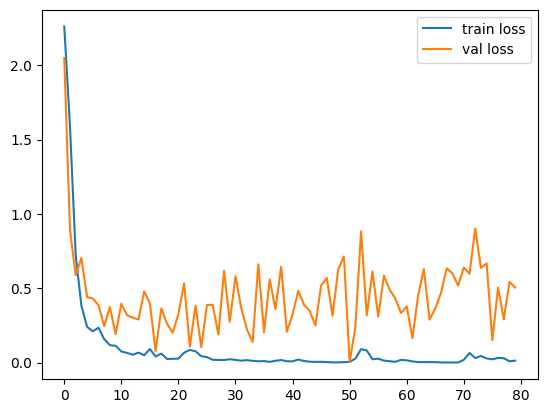

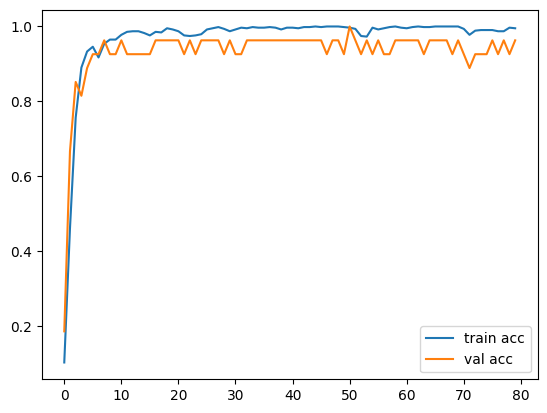

<Figure size 640x480 with 0 Axes>

In [78]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [79]:
# Lưu a h5 file
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/AI/Name_class/model_inception.h5')

In [80]:

from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/AI/Name_class/model_inception.h5')
model

In [81]:
import os
os.chdir('/content/drive/MyDrive/AI/Name_class/Valid')

In [82]:
!ls

AccVal_acc.png	Anh1.jpg  Anh4.jpg  Anh7.jpg  AnhME.jpg
Anh10.jpg	Anh2.jpg  Anh5.jpg  Anh8.jpg  LossVal_loss.png
Anh11.jpg	Anh3.jpg  Anh6.jpg  Anh9.jpg


# **CHẠY THỬ NGHIỆM**

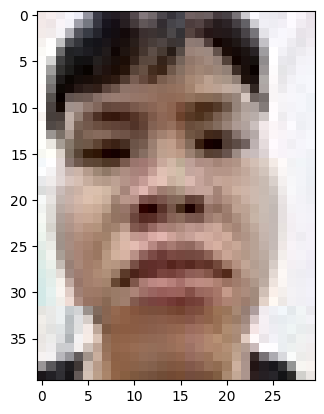

In [83]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical, load_img, img_to_array
img_data = load_img('/content/drive/MyDrive/AI/Name_class/Valid/Anh9.jpg')
img_data = img_to_array(img_data)
plt.imshow(img_data/255)

Chọn image : AnhME
1/1 [==============================] - 0s 224ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Tri
Chọn image : Anh11
1/1 [==============================] - 0s 22ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Chuong
Chọn image : Anh11
1/1 [==============================] - 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Chuong
Chọn image : Anh7
1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Tu
Chọn image : Anh9
1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Tuan


KeyboardInterrupt: ignored

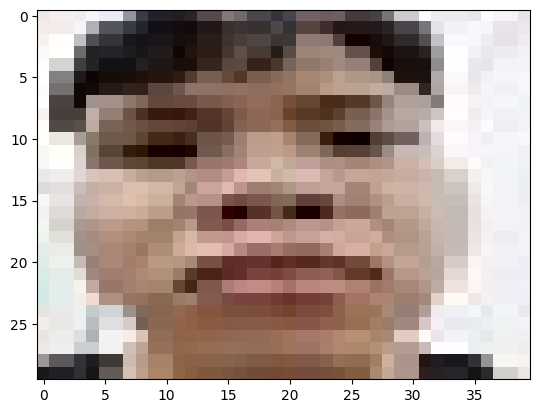

In [84]:
import numpy as np
from keras.preprocessing import image
while 1 :
 ch = input('Chọn' ' image : ')
 if (ch=='-'):
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/AI/Name_class/Valid/{}.jpg".format(ch),
                             target_size=(30,40)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     result = model.predict(test_image)
     training_set.class_indices
     print(result)
     x=0
     c=0
     i=0
     while (i<10):
       if result[0][i]>=x:
         x=result[0][i]
         c=i
        
       i=i+1
     if (x==0 and c==9) :
         c=10
     if c == 0:
       prediction = 'CPhi'
     elif c == 1:
       prediction = 'Chi'
     elif c == 2:
       prediction = 'Chuong'
     elif c == 3:
       prediction = 'NHuy'
     elif c == 4:
       prediction = 'Phong'
     elif c==5:
       prediction ='Thang'
     elif c == 6:
       prediction = 'Tri'
     elif c == 7:
       prediction = 'Tu'
     elif c == 8:
       prediction = 'Tuan'
     elif c==9:
       prediction ='VBinh'
           
     print(prediction)
   except:
      print('Tên của hình ảnh không tồn tại '  )



In [ ]:
training_set.class_indices

{'CPhi': 0,
 'Chi': 1,
 'Chuong': 2,
 'NHuy': 3,
 'Phong': 4,
 'Thang': 5,
 'Tri': 6,
 'Tu': 7,
 'Tuan': 8,
 'VBinh': 9}